<a href="https://colab.research.google.com/github/doSwayamCode/ml-daily/blob/main/end_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [3]:
df =pd.read_csv('/content/placement.csv')

In [4]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.shape

(100, 4)

In [8]:
# steps

#1 preprocessing + EDA + feature selection
#2 extract input and output columns
#3 scale the values
#4 train test split (cross validation)
#5 evaluate the model/model selection
#6 deploy the model

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [10]:
df = df.iloc[:, 1:]
# this means we dont want first row, and should start from 1 onwards.

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
import matplotlib.pyplot as plt

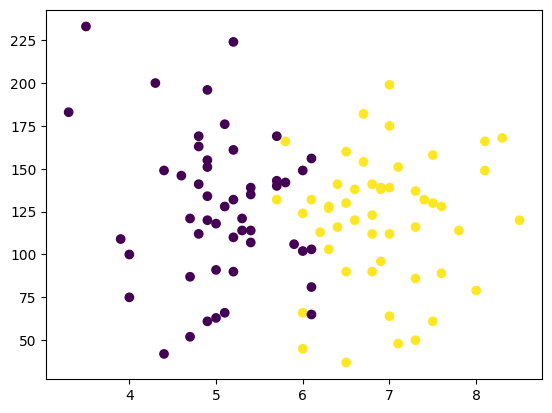

In [14]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [15]:
# Logistic regression

In [16]:
X = df.iloc[:, 0:2]
# saare rows chahiye...and, 0 se lekr 2 tak, 1 nahi ayega.
y = df.iloc[:, -1]
# saare rows chahiye and -1 wala column chahiye (-1 mtlb last column)


In [17]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.1)
#0.1 mtlb 10% jayenge test me, and baaki ke 90% training me

In [21]:
X_train

,cgpa,iq
53,8.3,168.0
34,4.8,163.0
87,5.7,132.0
27,6.0,124.0
83,7.5,130.0
...,...,...
5,7.1,48.0
28,5.2,90.0
81,5.4,107.0
25,5.0,91.0


In [22]:
y_train

,placement
53,1
34,0
87,1
27,1
83,1
...,...
5,1
28,0
81,0
25,0


In [26]:
# Scaling
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)

In [29]:
X_train

array([[ 2.00147373e+00,  1.06491547e+00],
       [-1.04130728e+00,  9.43195393e-01],
       [-2.58877876e-01,  1.88530883e-01],
       [ 1.93192445e-03, -6.22124865e-03],
       [ 1.30598093e+00,  1.39842850e-01],
       [ 1.93192445e-03, -1.92939855e+00],
       [ 1.13210773e+00,  3.10250965e-01],
       [ 1.21904433e+00,  1.88530883e-01],
       [ 6.97424726e-01,  4.07627031e-01],
       [ 2.62741725e-01, -5.17445594e-01],
       [ 1.75805125e-01, -2.74005430e-01],
       [ 1.82760053e+00,  1.01622744e+00],
       [ 2.17534693e+00, -1.03597314e-01],
       [ 5.23551525e-01, -1.03597314e-01],
       [ 9.58234526e-01,  6.51067195e-01],
       [-1.73680008e+00, -1.19907805e+00],
       [-2.58877876e-01,  1.08925949e+00],
       [-2.34535628e+00,  1.43007572e+00],
       [ 1.39291753e+00, -8.58261824e-01],
       [-7.80497477e-01,  1.25966761e+00],
       [-7.80497477e-01, -1.41817420e+00],
       [-9.54370677e-01,  6.51067195e-01],
       [-6.06624277e-01, -2.49661413e-01],
       [ 6.

In [30]:
X_test = scaler.transform(X_test)

In [31]:
  X_test

array([[ 0.87129793,  0.358939  ],
       [ 0.69742473, -0.03056527],
       [-1.73680008, -0.59047764],
       [ 0.00193192,  0.60237916],
       [ 0.78436133,  0.33459498],
       [ 0.08886852, -1.44251822],
       [-1.04130728, -0.29834945],
       [ 0.08886852,  0.18853088],
       [ 0.78436133, -0.68785371],
       [-1.12824388, -0.0792533 ]])

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf = LogisticRegression()

In [34]:
# model training
clf.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = clf.predict(X_test)

In [36]:
y_test

,placement
32,1
0,1
18,0
33,0
11,1
56,0
59,0
71,1
66,1
24,0


In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test, y_pred)

0.9

In [40]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

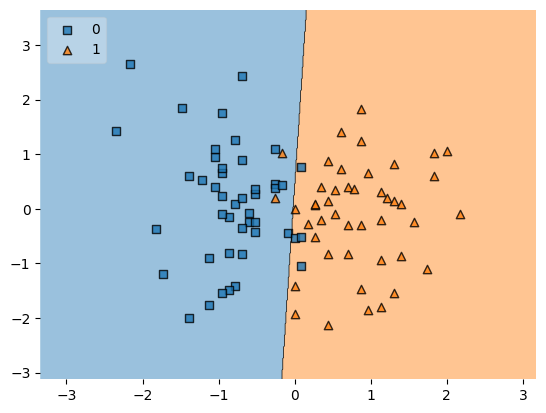

In [41]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [42]:
import pickle

In [43]:
pickle.dump(clf, open('model.pkl', 'wb'))